## 공공데이터 상권정보 분석해보기
- https://www.data.go.kr/data/15069540/fileData.do

### 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as mp
import seaborn as sns

### 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) #마이너스 폰트 깨지는 문제 대처하기 위함
%matplotlib inline 
#그래프가 노트북 안에 보이게 하기 위해

### 데이터 로드하기

In [3]:
from glob import glob
glob('data/*.csv')

['data\\도로교통공단_월별 주야별 교통사고 통계_20211231.csv',
 'data\\소상공인시장진흥공단_상가업소정보_의료기관_201909.csv']

In [4]:
df = pd.read_csv('data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)
df.shape

(91335, 39)

### 데이터 미리보기

In [5]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [6]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


### 데이터 요약하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

### 결측치

In [10]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

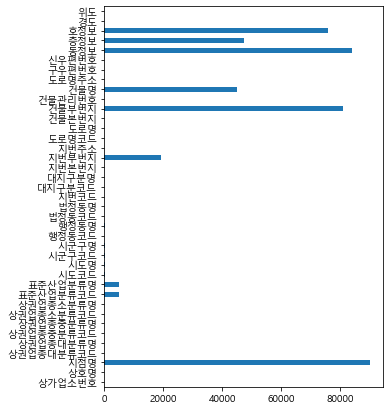

In [11]:
null_count.plot.barh(figsize=(5,7))

In [12]:
# reset_index 통해 데이터 프레임으로 만들어준다.

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 컬럼명 변경하기

In [13]:
df_null_count.columns = ['컬럼명','결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 정렬하기

In [14]:
df_null_count_top = df_null_count.sort_values(by='결측치수', ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


### 특정 컬럼만 불러오기

In [15]:
df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [16]:
drop_columns = df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [17]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


### 제거하기

In [18]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [19]:
df.info()
# 제거 후 메모리 용량 줄어듦

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

### 기초 통계량 보기

In [20]:
df['위도'].mean() 

36.62471119236673

In [21]:
df['위도'].median() # 최댓값, 최솟값의 영향을 받지 않음.

37.2346523177033

In [22]:
df['위도'].max()

38.4996585705598

In [23]:
df['위도'].min()

33.2192896688307

In [24]:
df['위도'].count() # 결측치 제외한 값

91335

In [25]:
df['위도'].describe() # 25% -- 1사분위수, 50% -- median(), 2사분위수, 75% -- 3사분위수

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [26]:
df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [27]:
df.describe(include='object')
# unique-- 중복제거한 값, top -- 가장 많이 등장한 키워드, freq -- 빈도수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [28]:
print(df['상권업종대분류명'].unique())
print(df['상권업종대분류명'].nunique())

['의료']
1


In [29]:
print(df['상권업종중분류명'].unique())
print(df['상권업종중분류명'].nunique())

['병원' '약국/한약방' '수의업' '유사의료업' '의료관련서비스업']
5


In [30]:
print(df['상권업종소분류명'].unique())
print(df['상권업종소분류명'].nunique())

['산부인과' '내과/외과' '신경외과' '기타병원' '약국' '동물병원' '한약방' '탕제원' '정형/성형외과' '소아과'
 '이비인후과의원' '노인/치매병원' '언어치료' '수의업-종합' '한의원' '치과의원' '침구원' '일반병원' '안과의원'
 '조산원' '한방병원' '종합병원' '유사의료업기타' '응급구조대' '혈액원' '치과병원' '척추교정치료' '피부과' '비뇨기과'
 '치과기공소' '산후조리원' '접골원' '수의업-기타' '제대혈']
34


In [31]:
print(len(df['상권업종중분류명'].unique()))
print(df['상권업종중분류명'].nunique())

5
5


In [32]:
city = df['시도명'].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [33]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있음
city_normalize = df['시도명'].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

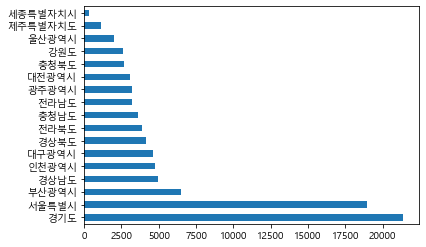

In [34]:
# pandas는 plot 기능을 내장하고 있음
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

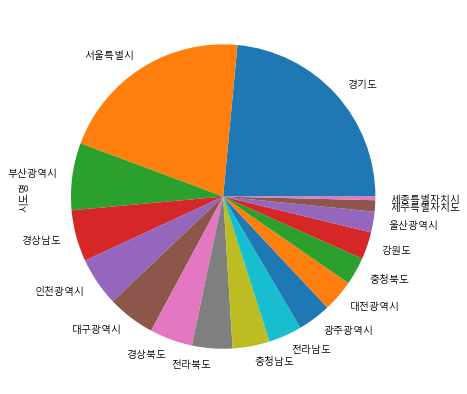

In [35]:
city_normalize.plot.pie(figsize=(7,7))
# 서울특별시, 경기도를 제외한 지역들의 경우 대소를 비교하기 어려움
# 막대그래프가 분석에 더 적합

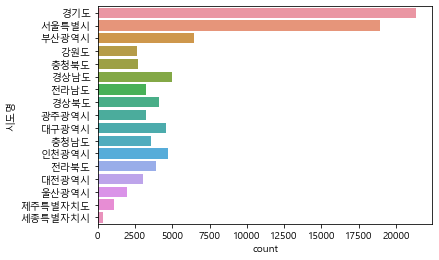

In [36]:
c = sns.countplot(data=df, y='시도명')
# countplot의 경우 보통 x나 y 둘 중 하나만 사용
# seaborn의 장점 : 고급통계기능을 제공(value_count 직접 구할 필요 없음), 예쁜 스타일
# 단점: 데이터 클수록 느림
# <AxesSubplot:xlabel='count', ylabel='시도명'> 텍스트 출력되는 게 싫다면 변수명에 담아주기

In [37]:
a = df['상권업종중분류명'].value_counts()
a

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [38]:
b = df['상권업종중분류명'].value_counts(normalize=True)
b

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

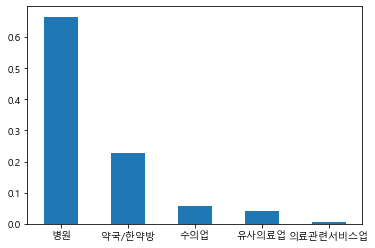

In [39]:
b.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

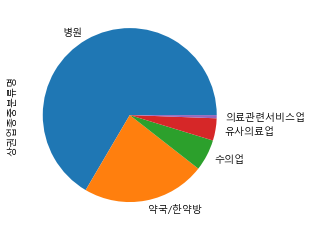

In [40]:
b.plot.pie()

In [41]:
c= df['상권업종소분류명'].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

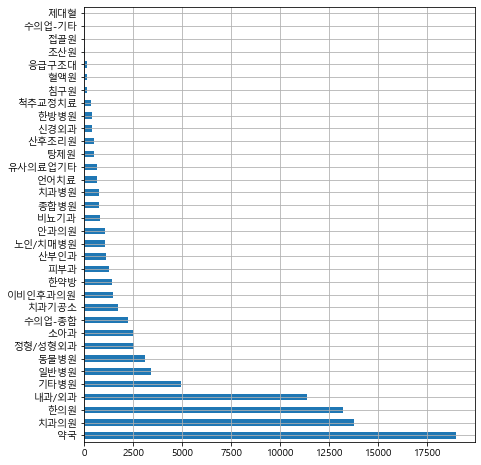

In [42]:
c.plot.barh(figsize=(7,8),grid=True)

### 데이터 색인하기

In [43]:
df_medical = df[df['상권업종중분류명']=='약국/한약방'].copy() # 다른 목적으로 사용 시 #원본에 영향없도록
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [44]:
df.loc[df['상권업종대분류명']=='의료', '상권업종중분류명'].value_counts() 
#중괄호 2번 쓰게 되면 데이터를 2번 읽게 되므로 하나의 중괄호에 콤마(,)로 연결하자(연산속도 빠르게)

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [45]:
df_medi = df[df['상권업종중분류명']=='유사의료업']
df_medi.shape

(3774, 29)

In [46]:
df['상호명'].value_counts().head(10) #method chaining

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [47]:
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [48]:
df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]
print(df_seoul_drug.shape)
df_seoul_drug.head()
# and -- &, or -- |
# 연산자 우선순위 때문에 괄호 써줘야 함

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349


In [49]:
c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [50]:
n = df_seoul_drug['시군구명'].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

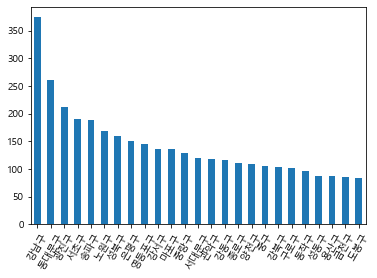

In [51]:
c.plot.bar(rot=60)

In [52]:
df_seoul_hospital = df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')].copy()
df_seoul_hospital

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,...,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,...,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [53]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

In [54]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [55]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [56]:
drop_row = df_seoul_hospital[
 df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [57]:
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [58]:
drop_row = drop_row + drop_row2
len(drop_row)

33

In [59]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row) #기본 axis=0, 즉 행 기준
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<AxesSubplot:>

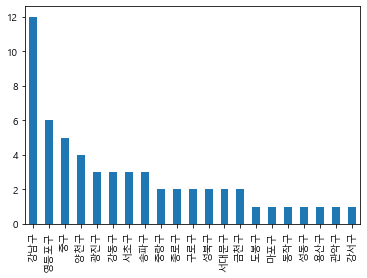

In [60]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

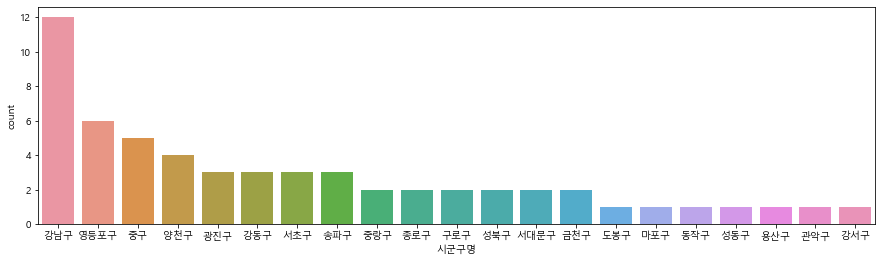

In [63]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x='시군구명',
              order=df_seoul_hospital['시군구명'].value_counts().index)

In [62]:
df_seoul_hospital['상호명'].unique()

#'우울증센터', '마취과', '특수여객' 등은 종합병원으로 볼 수 없음
# 여전히 전처리 후에도 전처리 해야할 것들이 남아 있음
# 데이터 전처리가 가장 시간이 많이 걸림

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [68]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 29)

In [71]:
df_seoul['시군구명'].value_counts().head()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
Name: 시군구명, dtype: int64

<AxesSubplot:>

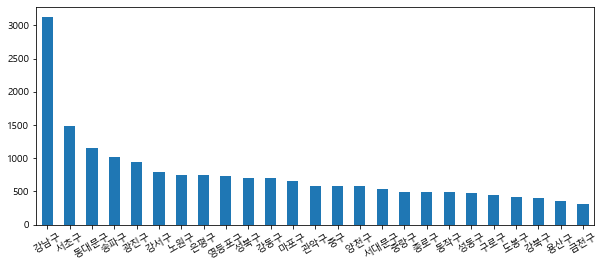

In [73]:
# pandas 활용
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4), rot=30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

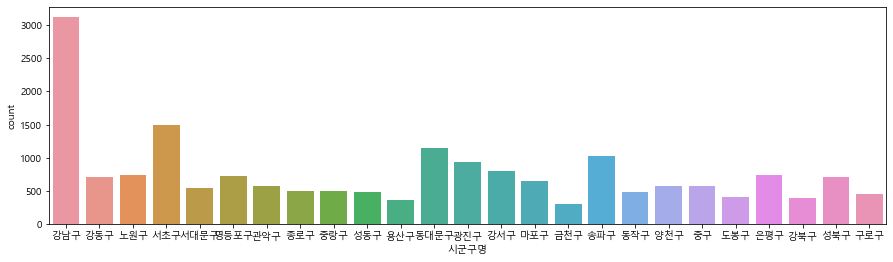

In [77]:
# seaborn 활용
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

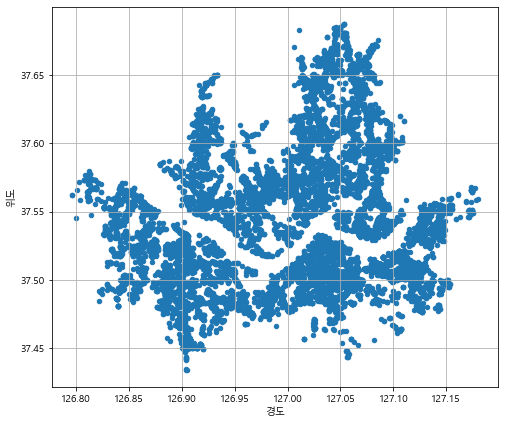

In [82]:
# pandas 활용
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x='경도', y='위도', figsize=(8,7), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

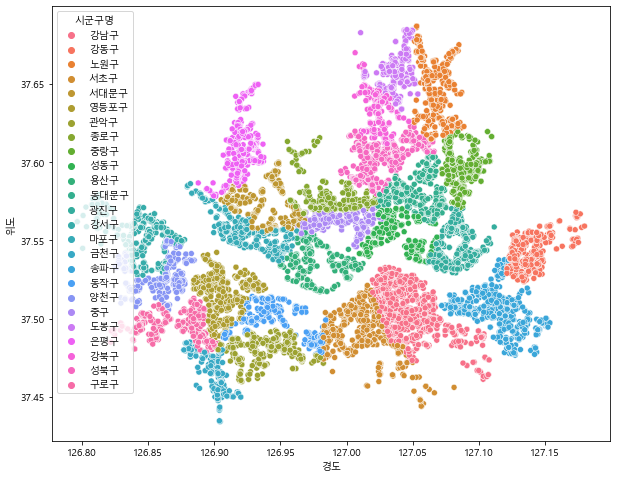

In [84]:
# seaborn 활용
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

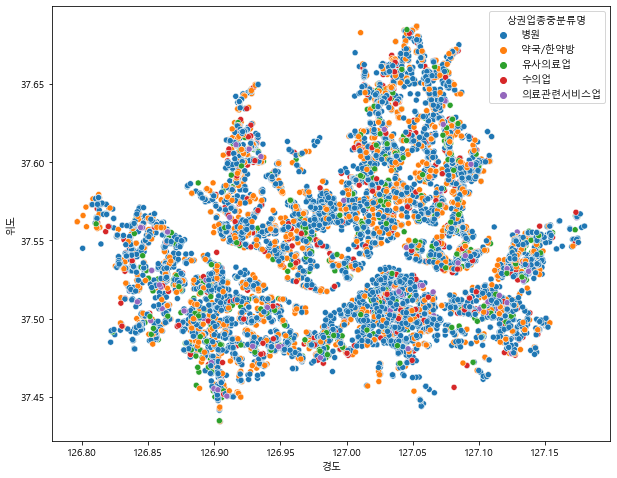

In [85]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='상권업종중분류명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

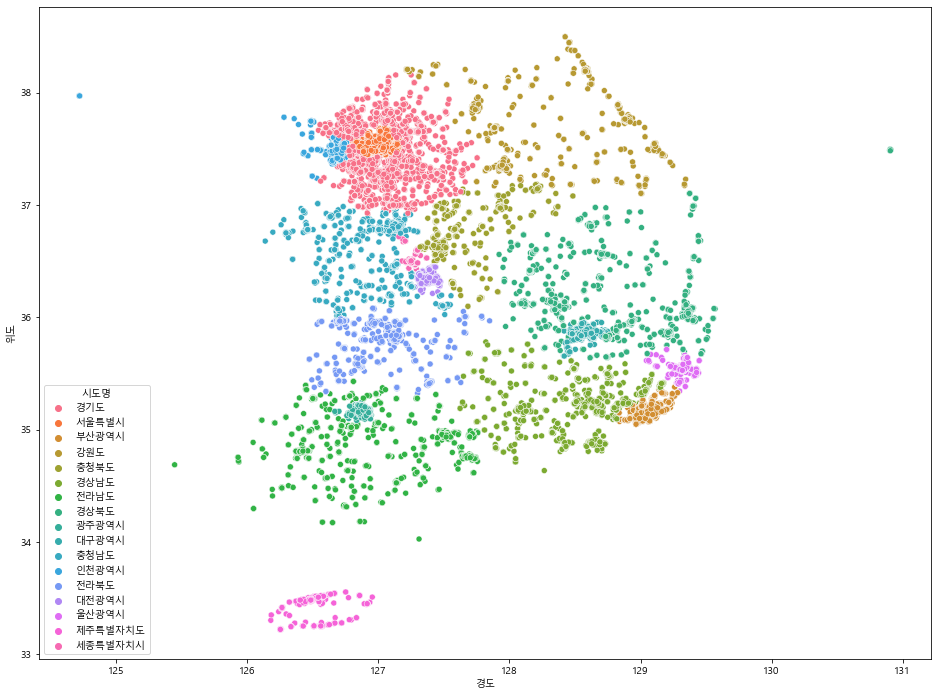

In [89]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x='경도', y='위도', hue='시도명')

### Folium으로 지도 활용하기

In [90]:
!pip install Folium

In [92]:
import folium

In [95]:
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589356625

In [104]:
 map = folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], 
            zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    address = df_seoul_hospital.loc[n, '도로명주소']
    popup = f"{name}-{address}"    
    location = [df_seoul_hospital.loc[n, '위도'],df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map